# Perkenalan

Saat ini, masyarakat banyak yang lebih memilih untuk menggunakan jasa transportasi online karena hal itu dapat mengurangi stres dan seseorang dapat menggunakan waktu itu untuk melakukan hal-hal lain. Hal itu merupakan dasar pemikiran di balik dibentuknya Uber dan Lyft. Uber dan Lyft adalah yang menawarkan layanan transportasi melalui aplikasi seluler. Uber merupakan perusahaan global tersedia di 69 negara dan sekitar 900 kota di seluruh dunia, sedangkan Lyft tersedia di sekitar 644 kota di AS dan 12 Kota di Kanada. Namun, Lyft merupakan perusahaan transportasi online terbesar kedua dengan pangsa pasar 31% di AS. Pada kedua aplikasi tersebut, harga yang ditawarkan selalu berubah-ubah.

Berdasarkan hal itu, diperlukan analisis untuk mengetahui faktor-faktor yang mempengaruhi penetapan harga dan untuk memprediksi harga, yaitu dengan menggunakan regresi linear. Oleh karena itu, kami menggunakan data dari kaggle dimana terdapat sebuah kumpulan data yang berisi informasi-informasi dari aplikasi Uber dan Lyft. Pada dataset tersebut berisi 693071 baris dan 57 kolom atau variabel.

# Import Pustaka

In [128]:
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
mpl.style.use(["ggplot"])
pd.set_option("display.max.columns",None)

# Data Loading

Import file *rideshare_kaggle.csv* dan memasukkannya ke dalam variabel *df*.

In [151]:
df = pd.read_csv("rideshare_kaggle.csv")
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


# Data Cleaning

Periksa apakah terdapat nilai *NaN* pada dataframe.

In [152]:
df.isnull().sum()[df.isnull().sum() > 0]

price    55095
dtype: int64

Mengganti nilai *NaN* pada kolom *price* dengan nilai rata-ratanya.

In [ ]:
df["price"] = df["price"].fillna(df["price"].mean())

Membuang kolom yang tidak diperlukan, yaitu:
- *id*: Hanya ID observasi dan bersifat unik untuk setiap baris
- *datetime*: Sudah terdapat kolom *hour*, *day*, dan *month*
- *timestamp*: Mirip dengan kolom *datetime*
- *timezone*: Hanya terdapat 1 timezone

In [153]:
df = df.drop(["id","timestamp","datetime","timezone"],axis=1)
df.head()

,hour,day,month,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,9,16,12,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,2,27,11,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,1,28,11,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,4,30,11,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,3,29,11,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


Mencari nilai koefisien korelasi antarvariabel numerik dan kategorik dengan menggunakan bantuan libary *dython*.

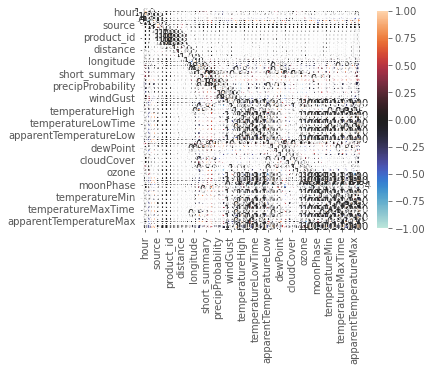

In [163]:
from dython.nominal import associations

corr = associations(df)

Karena kita ingin mengetahui variabel mana saja yang paling berpengaruh terhadap variabel *price*, kita dapat mengurutkan secara descending dan mengambil 10 teratas. Tanda + dan - hanya menunjukkan arah hubungan (searah atau berlawanan) sehingga nilai koefisen korelasi dapat dimutlakkan untuk memudahkan proses pengurutan.

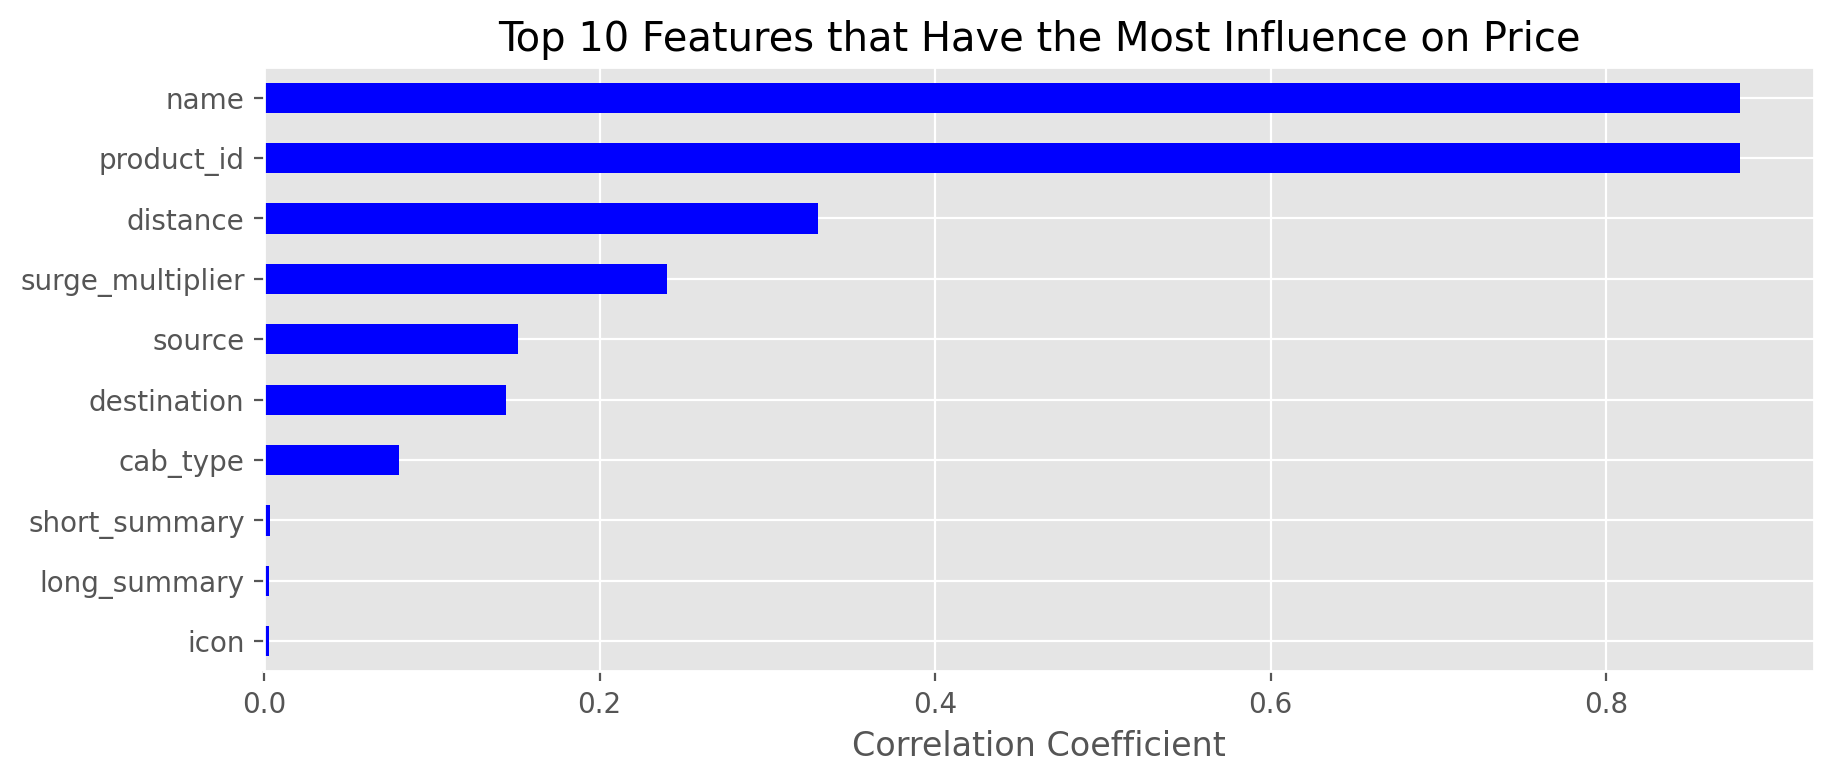

In [164]:
top_10_corr = abs(corr["corr"][["price"]].drop("price")).sort_values("price",ascending=False).head(10)

fig = plt.figure(figsize=(10,4),dpi=200)
top_10_corr.sort_values("price").plot(
    kind="barh",
    legend=None,
    color="blue",
    ax=plt.gca()
)
plt.title("Top 10 Features that Have the Most Influence on Price")
plt.xlabel("Correlation Coefficient")
plt.show()

Melakukan slicing dimana kita hanya mengambil 10 variabel dengan nilai koefisien korelasi tertinggi.

In [165]:
df = df[list(top_10_corr.index) + ["price"]]
df.head()

,product_id,name,distance,surge_multiplier,source,destination,cab_type,short_summary,long_summary,icon,price
0,lyft_line,Shared,0.44,1.0,Haymarket Square,North Station,Lyft,Mostly Cloudy,Rain throughout the day.,partly-cloudy-night,5.0
1,lyft_premier,Lux,0.44,1.0,Haymarket Square,North Station,Lyft,Rain,"Rain until morning, starting again in the eve...",rain,11.0
2,lyft,Lyft,0.44,1.0,Haymarket Square,North Station,Lyft,Clear,Light rain in the morning.,clear-night,7.0
3,lyft_luxsuv,Lux Black XL,0.44,1.0,Haymarket Square,North Station,Lyft,Clear,Partly cloudy throughout the day.,clear-night,26.0
4,lyft_plus,Lyft XL,0.44,1.0,Haymarket Square,North Station,Lyft,Partly Cloudy,Mostly cloudy throughout the day.,partly-cloudy-night,9.0


# Explorasi Data

Melihat hubungan antara setiap variabel numerik dengan *price* menggunakan scatter plot.

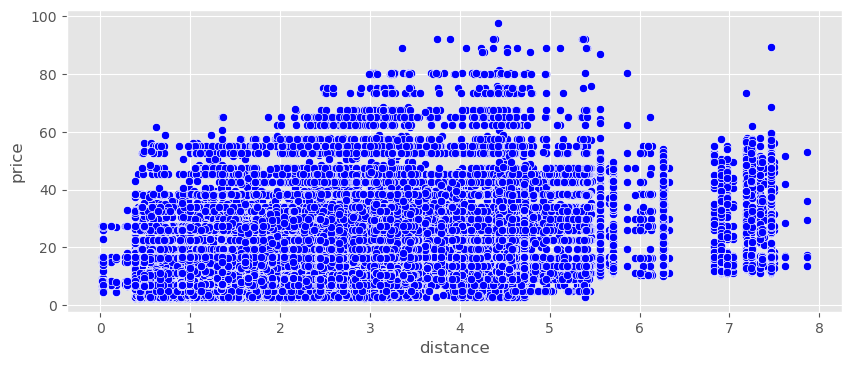

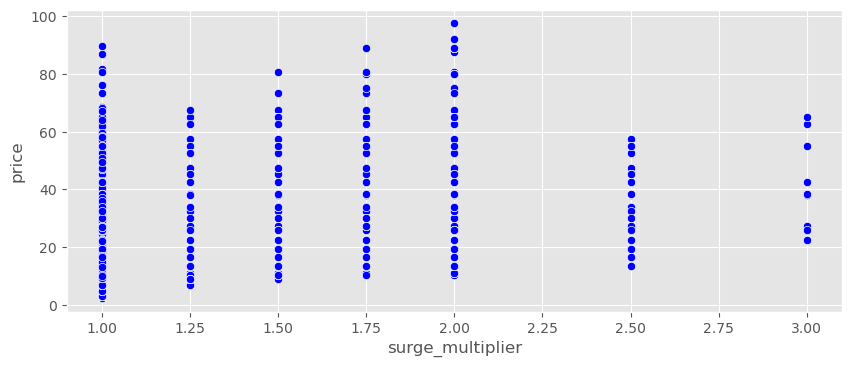

In [166]:
for i in df.columns[df.dtypes != object][:-1]:
    plt.figure(figsize=(10,4),dpi=100)
    sns.scatterplot(data=df,x=i,y="price",color="blue")
    plt.show()

Untuk variabel kategorik, kita dapat melakukan *groupby* nilai rata-rata *price* berdasarkan setiap kategori, kemudian dibuat plot menggunakan bar plot.

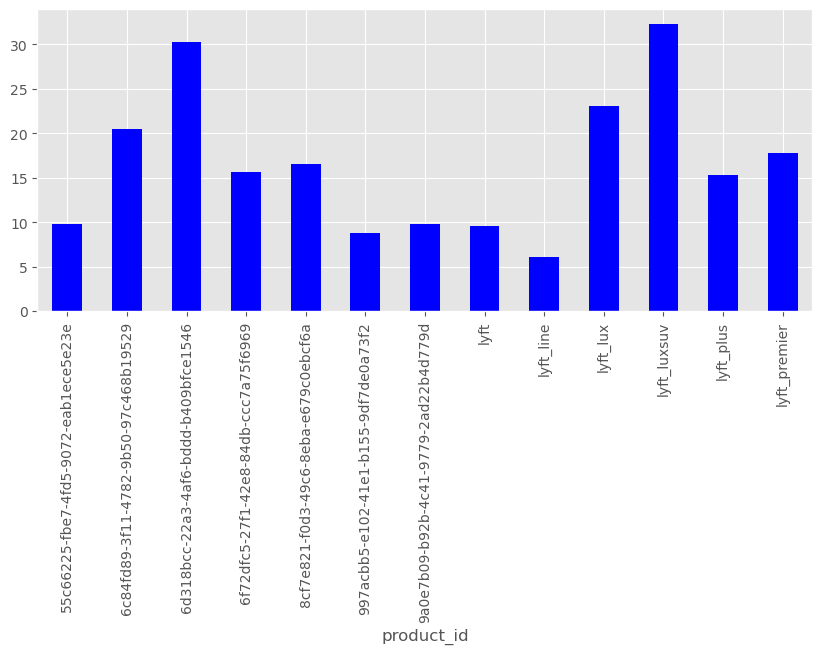

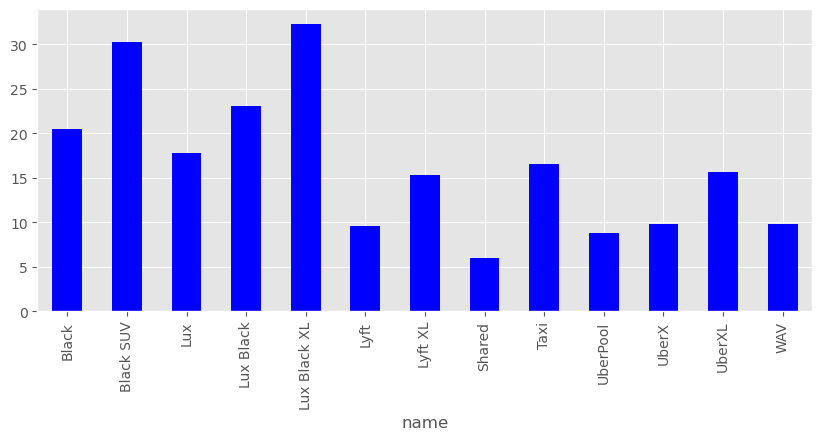

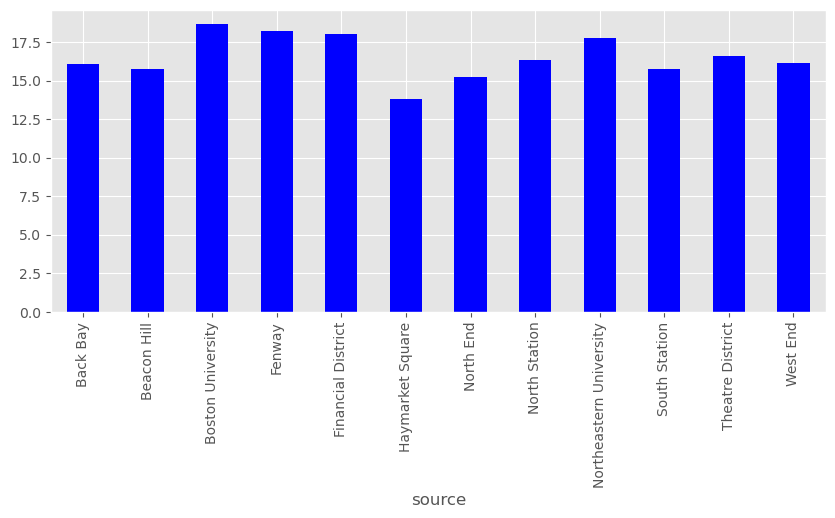

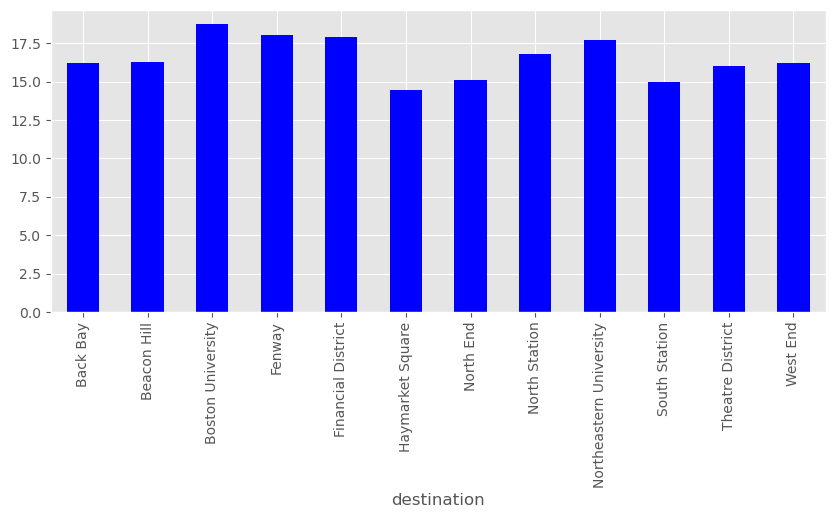

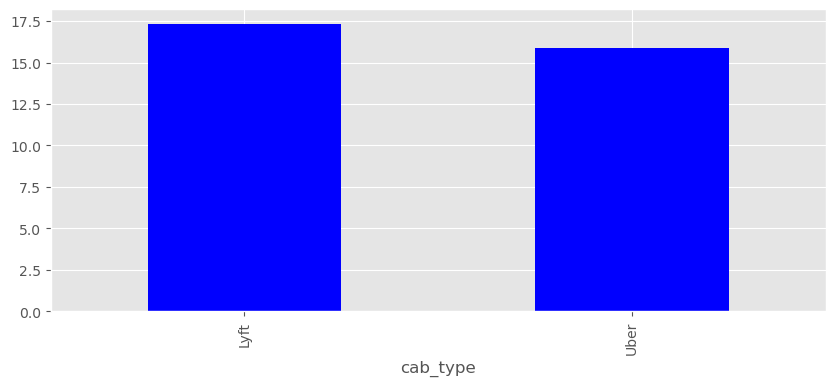

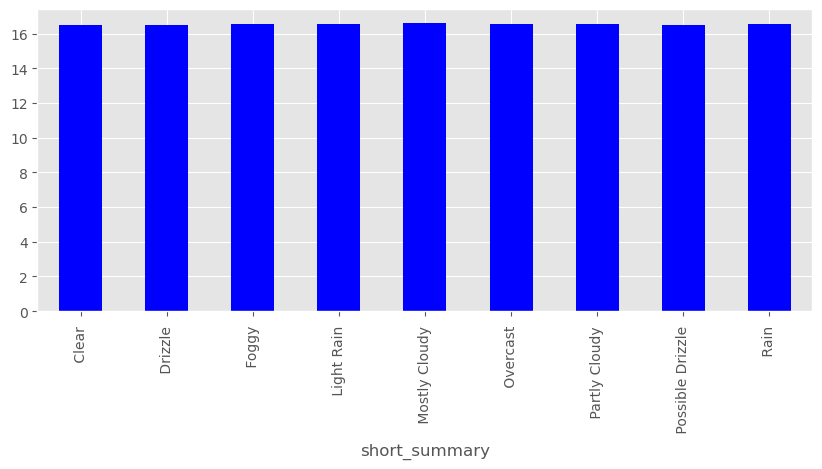

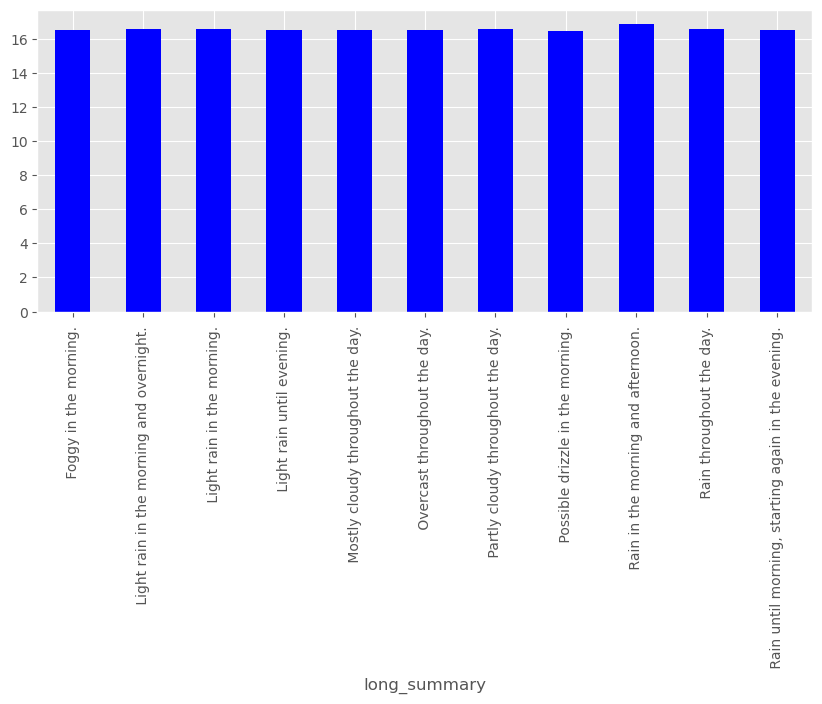

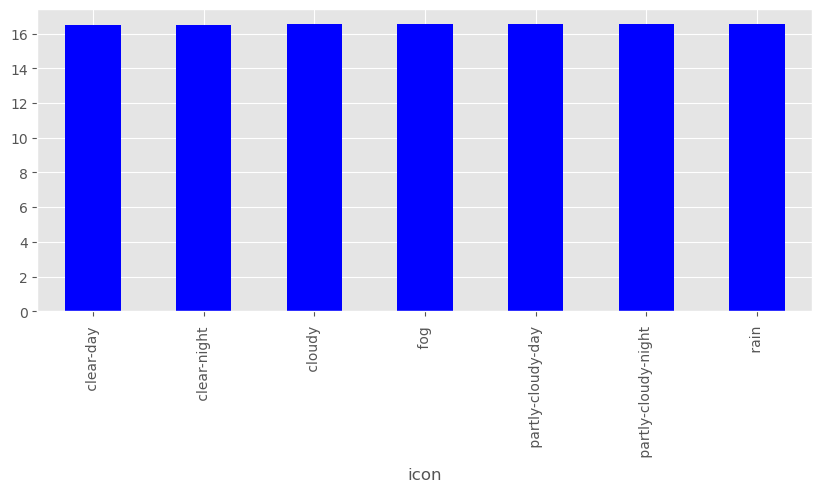

In [167]:
for i in df.columns[df.dtypes == object]:
    fig = plt.figure(figsize=(10,4),dpi=100)
    df.groupby(i).mean()[["price"]].plot(
        kind="bar",
        legend=None,
        color="blue",
        ax=plt.gca()
    )
    plt.show()

# Data Preprocessing

Mendefinisikan variabel independen (X) dan dependen (y). Pada variabel independen, karena terdapat variabel kategorik, dapat diberi kode terlebih dahulu menggunakan *LabelEncoder*.

In [168]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X = df.drop("price",axis=1).apply(le.fit_transform)
y = df["price"]

Membagi dataframe menjadi 2 set, yaitu training dan testing dengan rasio 70-30.

In [169]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1221)

print(f"Training dataset\t: {len(X_train)}")
print(f"Testing dataset\t\t: {len(X_test)}")

Training dataset	: 485149
Testing dataset		: 207922


Karena variabel independen memiliki satuan yang berbeda-beda, dapat dilakukan standarisasi menggunakan *StandardScaler*.

In [170]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Pendefinisian Model

In [171]:
from sklearn.linear_model import LinearRegression

base_model = LinearRegression()
base_model.fit(scaled_X_train,y_train)

LinearRegression()

In [172]:
base_pred = base_model.predict(scaled_X_test)

In [173]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

base_metrics = pd.DataFrame(
    data=[mean_absolute_error(y_test,base_pred),np.sqrt(mean_squared_error(y_test,base_pred)),r2_score(y_test,base_pred)],
    columns=["Metrics"],
    index=["MAE","RMSE","R2"]
)
base_metrics

,Metrics
MAE,4.867218
RMSE,6.165078
R2,0.525453


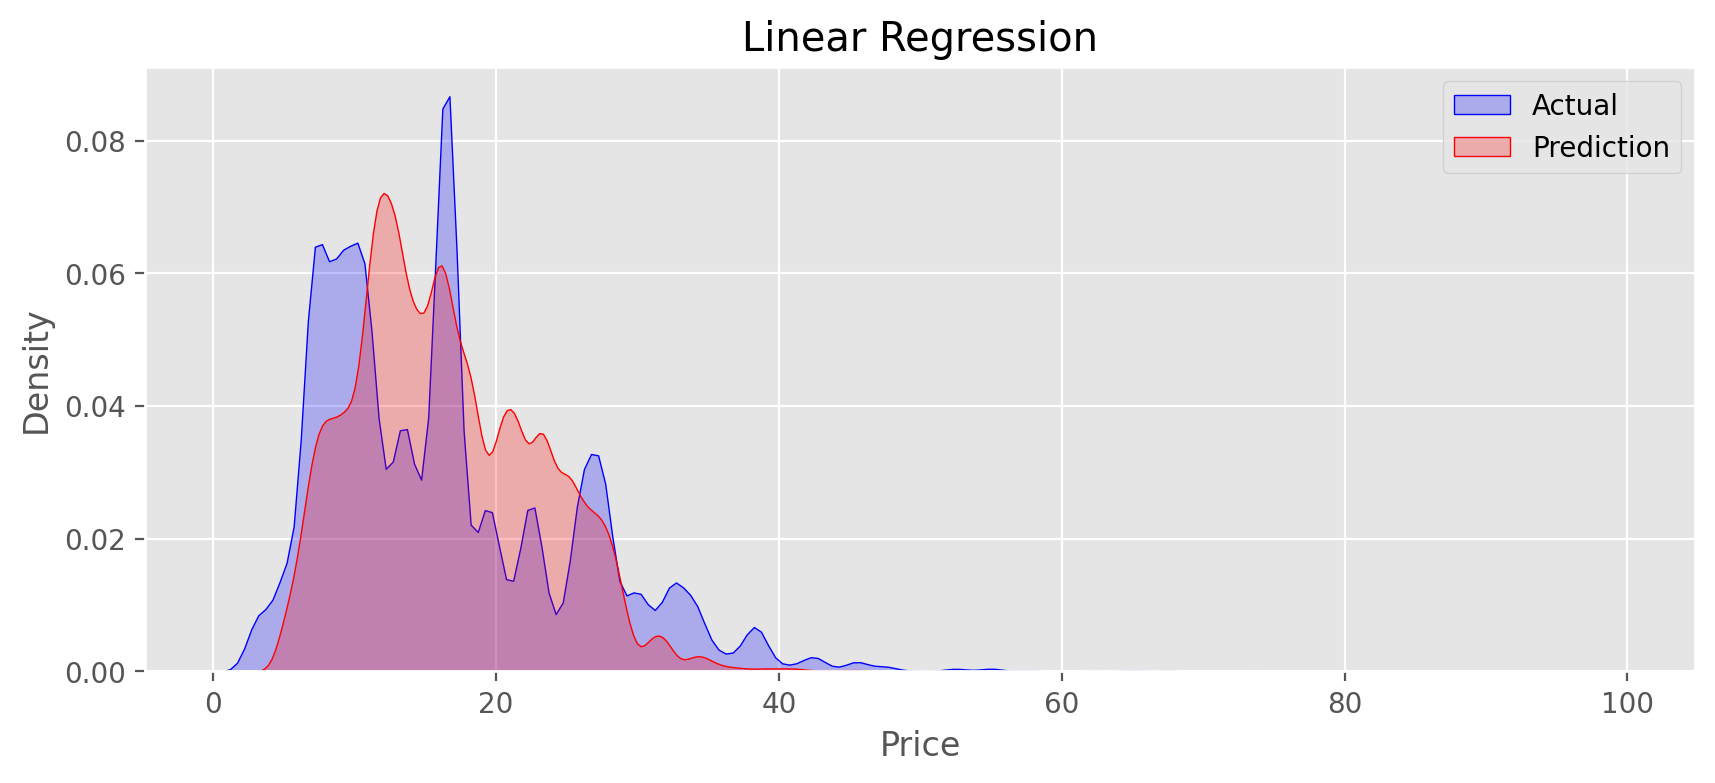

In [174]:
plt.figure(figsize=(10,4),dpi=200)
sns.kdeplot(y_test,color="blue",fill=True,label="Actual")
sns.kdeplot(base_pred,color="red",fill=True,label="Prediction")
plt.title("Linear Regression")
plt.xlabel("Price")
plt.legend(loc="upper right")
plt.show()

In [175]:
from sklearn.preprocessing import PolynomialFeatures

poly_2_X = PolynomialFeatures(degree=2,include_bias=False).fit_transform(X)

In [176]:
poly_2_X_train,poly_2_X_test,y_train,y_test = train_test_split(poly_2_X,y,test_size=0.3,random_state=1221)

scaled_poly_2_X_train = scaler.fit_transform(poly_2_X_train)
scaled_poly_2_X_test = scaler.transform(poly_2_X_test)

In [177]:
poly_2_model = LinearRegression()
poly_2_model.fit(scaled_poly_2_X_train,y_train)

LinearRegression()

In [178]:
poly_2_pred = poly_2_model.predict(scaled_poly_2_X_test)

In [179]:
poly_2_metrics = pd.DataFrame(
    data=[mean_absolute_error(y_test,poly_2_pred),np.sqrt(mean_squared_error(y_test,poly_2_pred)),r2_score(y_test,poly_2_pred)],
    columns=["Metrics"],
    index=["MAE","RMSE","R2"]
)
poly_2_metrics

,Metrics
MAE,3.468216
RMSE,4.419411
R2,0.756146


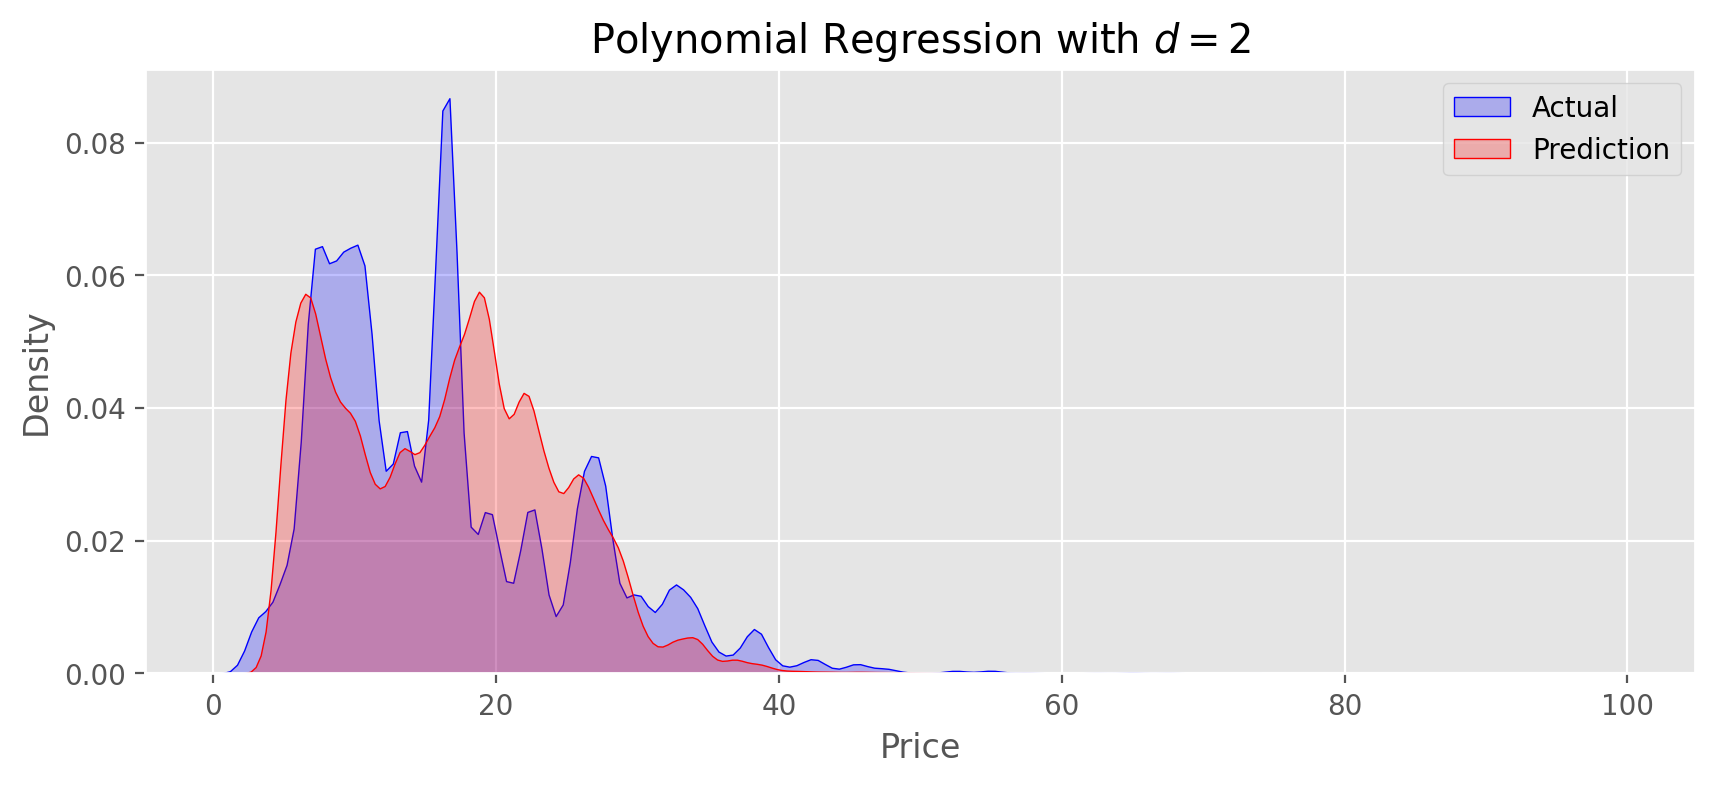

In [180]:
plt.figure(figsize=(10,4),dpi=200)
sns.kdeplot(y_test,color="blue",fill=True,label="Actual")
sns.kdeplot(poly_2_pred,color="red",fill=True,label="Prediction")
plt.title("Polynomial Regression with $ d = 2 $")
plt.xlabel("Price")
plt.legend(loc="upper right")
plt.show()

In [182]:
poly_3_X = PolynomialFeatures(degree=3,include_bias=False).fit_transform(X)

In [183]:
poly_3_X_train,poly_3_X_test,y_train,y_test = train_test_split(poly_3_X,y,test_size=0.3,random_state=1221)

scaled_poly_3_X_train = scaler.fit_transform(poly_3_X_train)
scaled_poly_3_X_test = scaler.transform(poly_3_X_test)

In [184]:
poly_3_model = LinearRegression()
poly_3_model.fit(scaled_poly_3_X_train,y_train)

LinearRegression()

In [185]:
poly_3_pred = poly_3_model.predict(scaled_poly_3_X_test)

In [186]:
poly_3_metrics = pd.DataFrame(
    data=[mean_absolute_error(y_test,poly_3_pred),np.sqrt(mean_squared_error(y_test,poly_3_pred)),r2_score(y_test,poly_3_pred)],
    columns=["Metrics"],
    index=["MAE","RMSE","R2"]
)
poly_3_metrics

,Metrics
MAE,1.253451
RMSE,1.832955
R2,0.958053


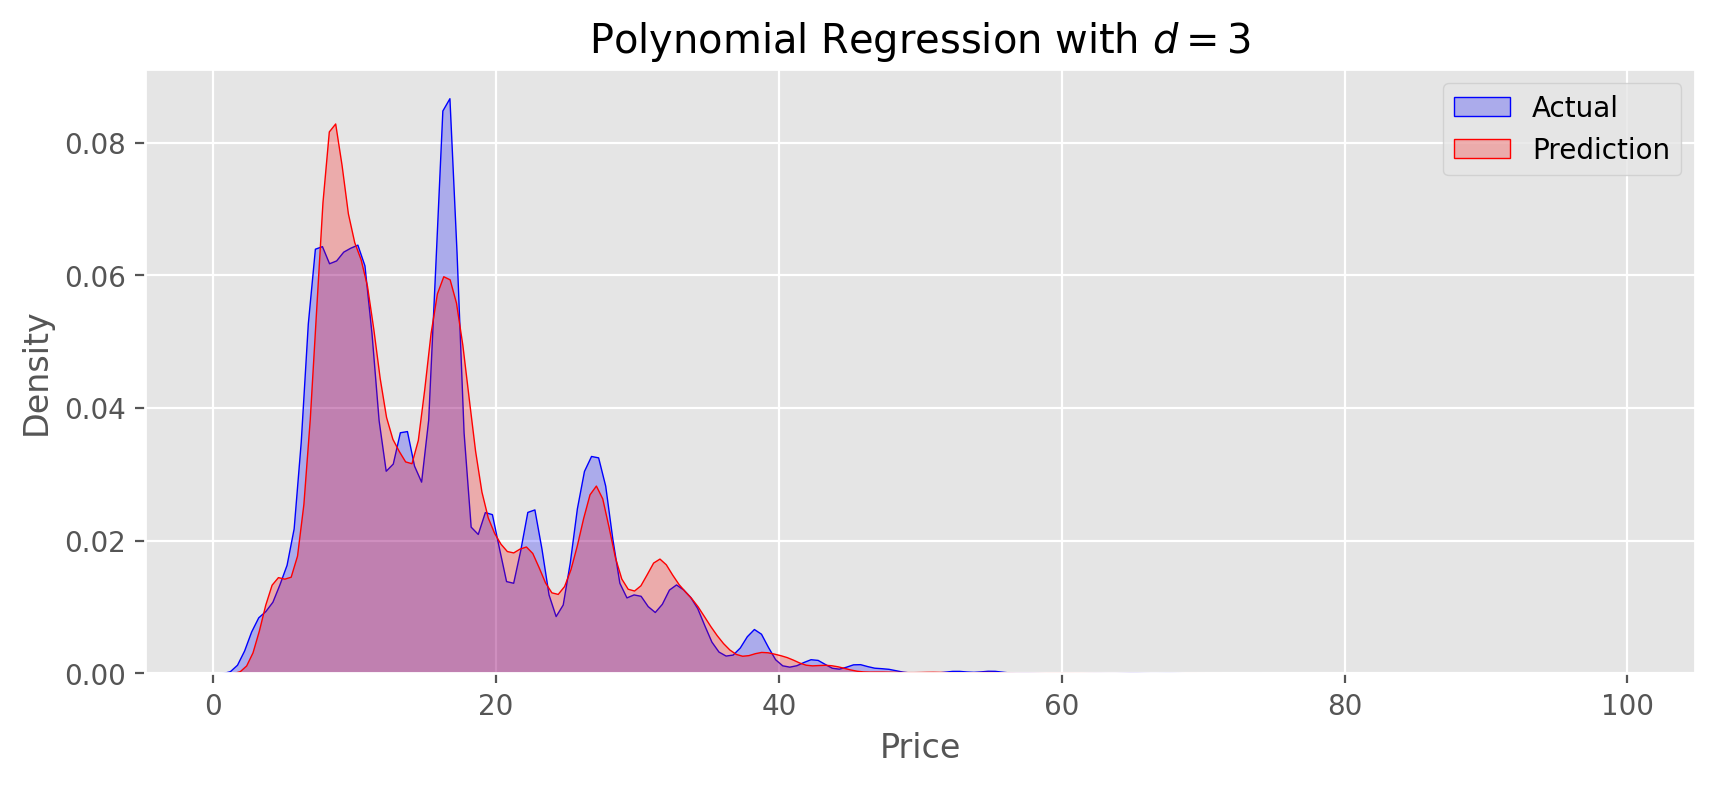

In [187]:
plt.figure(figsize=(10,4),dpi=200)
sns.kdeplot(y_test,color="blue",fill=True,label="Actual")
sns.kdeplot(poly_3_pred,color="red",fill=True,label="Prediction")
plt.title("Polynomial Regression with $ d = 3 $")
plt.xlabel("Price")
plt.legend(loc="upper right")
plt.show()

In [188]:
metrics = pd.concat([base_metrics,poly_2_metrics,poly_3_metrics],axis=1)
metrics.columns = ["Linear Regression","Polynomial Regression (d = 2)","Polynomial Regression (d = 3)"]
metrics.T

,MAE,RMSE,R2
Linear Regression,4.867218,6.165078,0.525453
Polynomial Regression (d = 2),3.468216,4.419411,0.756146
Polynomial Regression (d = 3),1.253451,1.832955,0.958053


In [189]:
final_base_model = LinearRegression().fit(X,y)
final_poly_2_model = LinearRegression().fit(poly_2_X,y)
final_poly_3_model = LinearRegression().fit(poly_3_X,y)

In [190]:
x_symbol = [sp.Symbol(f"({i})") for i in X.columns]
y_symbol = sp.Symbol("\hat{price}")

sums = np.round(final_base_model.intercept_,6)
for i in range(len(X.columns)):
    sums += x_symbol[i] * np.round(final_base_model.coef_[i],6)

sp.Eq(y_symbol,sums)

Eq(\hat{price}, 8.71116*(cab_type) + 0.016428*(destination) + 0.026472*(distance) + 0.000906*(icon) - 0.00145*(long_summary) - 1.587907*(name) + 0.780423*(product_id) + 0.003908*(short_summary) + 0.03077*(source) + 5.148593*(surge_multiplier) + 11.14904)

In [191]:
from joblib import dump

final_models = [final_base_model,final_poly_2_model,final_poly_3_model]
file_names = ["linear_regression","polynomial_2d_regression","polynomial_3d_regression"]

for i,j in zip(final_models,file_names):
    dump(i,j + ".joblib")
    print(f"{j}.joblib has been saved successfully!")

linear_regression.joblib has been saved successfully!
polynomial_2d_regression.joblib has been saved successfully!
polynomial_3d_regression.joblib has been saved successfully!
